In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

In [2]:
####################################################################
############################# Úloha 1: #############################
####################################################################

# Načítanie signálu #

MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read("piano.wav")
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N))
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

In [30]:
# Vybrané tóny #

# My tone A [MIDI 35]
A = 35
start = Nwholetone * (A - MIDIFROM)                   # začiatok tónu A
display(Audio(s[start:start + Nwholetone], rate=Fs))  # Celý tón A

toneA = xall[[A]]                                     # 0.5 s tónu A
#display(Audio(toneA, rate=Fs))

# My tone B [MIDI 47]
B = 47
start = Nwholetone * (B - MIDIFROM)                   # začiatok tónu B
display(Audio(s[start:start + Nwholetone], rate=Fs))  # Celý tón B

toneB = xall[[B]]                                     # 0.5 s tónu B
#display(Audio(toneB, rate=Fs))

# My tone C [MIDI 88]
C = 88
start = Nwholetone * (C - MIDIFROM)                   # začiatok tónu C
display(Audio(s[start:start + Nwholetone], rate=Fs))  # Celý tón C

toneC = xall[[C]]                                     # 0.5 s tónu C

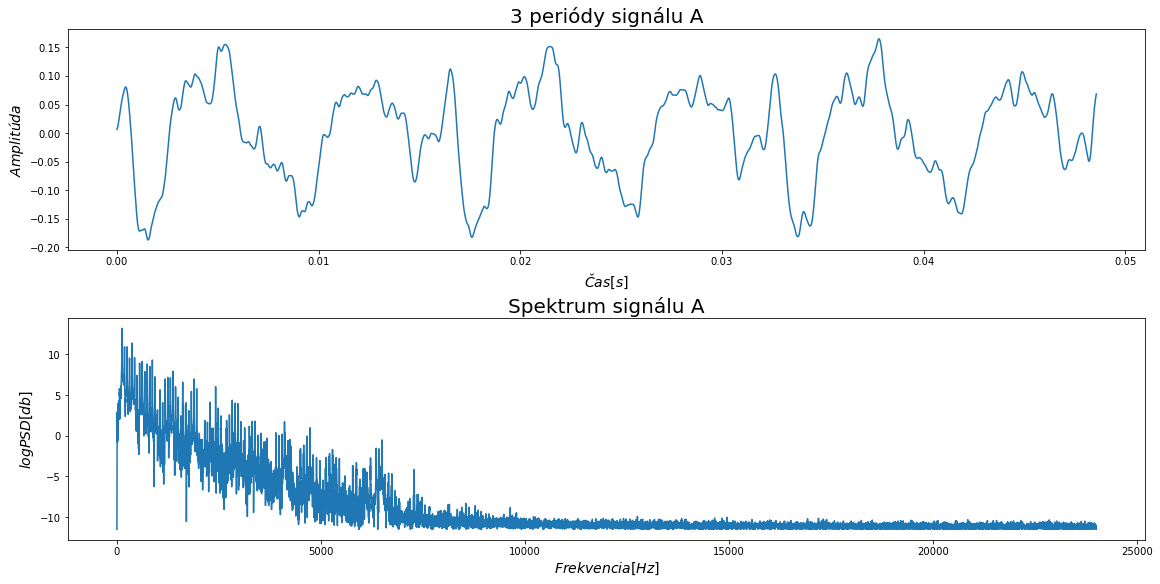

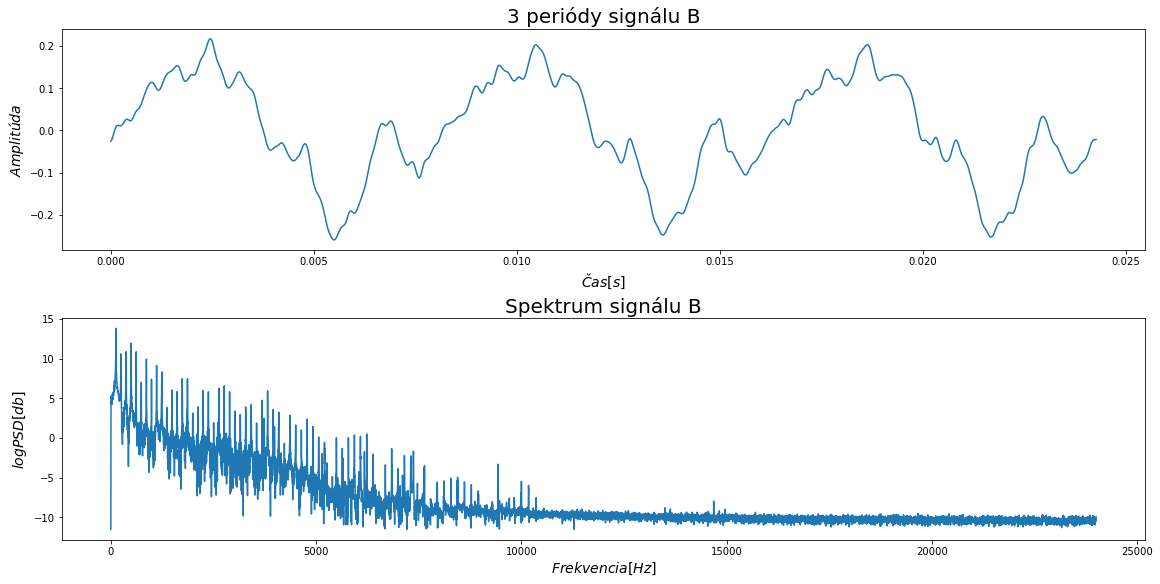

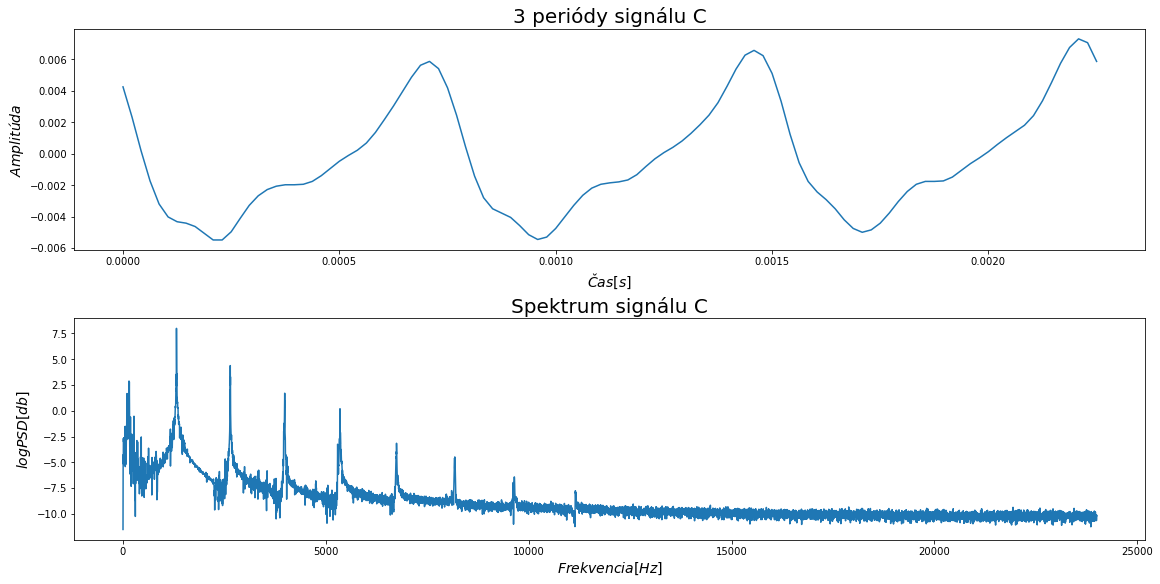

In [4]:
# Vykreslné 3 periódy každého tónu a jejich spektrum #

n = np.arange(0,N)
x = n / Fs                  # os x v sekundách

############################# signal A #############################

                            # 61.74 frekvencia MIDI 35
T = 1/61.74                 # jedna perioda
N_3p = int(Fs*3*T)          # počet vzorkov pre 3 periody signálu A

plt.figure(figsize=(16,8), constrained_layout= True)

# 3 periody signálu A
plt.subplot(211)
plt.title('3 periódy signálu A', fontsize='20')
plt.ylabel('$Amplitúda$', fontsize='14')
plt.xlabel('$Čas[s]$', fontsize='14')
plt.plot(x[:N_3p], toneA[0][:N_3p])

# spektrum signálu A
ToneA_DFT = np.fft.fft(toneA[0])
moduleA = np.abs(ToneA_DFT)
moduleHalf_A = moduleA[:moduleA.size // 2]   # Stačí nám polovica keďže dft je simetrické od stredu
F_A = np.arange(moduleHalf_A.size) * (Fs/N)  # Frekvencia sú F = vzorkovacia frekvencia / počet vzorkov

plt.subplot(212)
plt.title(label='Spektrum signálu A', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(F_A, np.log(np.abs(moduleHalf_A)**2 + 10 ** -5)) # Zobrazíme ako logaritmus

############################# signal B #############################

                            # 123.47 frekvencia MIDI 47
T = 1/123.47                # jedna perioda
N_3p = int(Fs*3*T)          # počet vzorkov pre 3 periody signálu B

plt.figure(figsize=(16,8), constrained_layout= True)

# 3 periody signálu B
plt.subplot(211)
plt.title('3 periódy signálu B', fontsize='20')
plt.ylabel('$Amplitúda$', fontsize='14')
plt.xlabel('$Čas[s]$', fontsize='14')
plt.plot(x[:N_3p], toneB[0][:N_3p])

# spektrum signálu B
ToneB_DFT = np.fft.fft(toneB[0])
moduleB = np.abs(ToneB_DFT)
moduleHalf_B = moduleB[:moduleB.size // 2]   # Stačí nám polovica keďže dft je simetrické od stredu
F_B = np.arange(moduleHalf_B.size) * (Fs/N)  # Frekvencia sú F = vzorkovacia frekvencia / počet vzorkov

plt.subplot(212)
plt.title(label='Spektrum signálu B', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(F_B, np.log(np.abs(moduleHalf_B)**2 + 10 ** -5)) # Zobrazíme ako logaritmus

############################# signal C #############################

                            # 1318.51 frekvencia MIDI 88
T = 1/1318.51               # jedna perioda
N_3p = int(Fs*3*T)          # počet vzorkov pre 3 periody signálu C

plt.figure(figsize=(16,8), constrained_layout= True)

# 3 periody signálu C
plt.subplot(211)
plt.title('3 periódy signálu C', fontsize='20')
plt.ylabel('$Amplitúda$', fontsize='14')
plt.xlabel('$Čas[s]$', fontsize='14')
plt.plot(x[:N_3p], toneC[0][:N_3p])

# spektrum signálu C
ToneC_DFT = np.fft.fft(toneC[0])
moduleC = np.abs(ToneC_DFT)
moduleHalf_C = moduleC[:moduleC.size // 2]   # Stačí nám polovica keďže dft je simetrické od stredu
F_C = np.arange(moduleHalf_C.size) * (Fs/N)  # Frekvencia sú F = vzorkovacia frekvencia / počet vzorkov

plt.subplot(212)
plt.title(label='Spektrum signálu C', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(F_C, np.log(np.abs(moduleHalf_C)**2 + 10 ** -5)) # Zobrazíme ako logaritmus


plt.show()

1318 1.6800689506023578
(DFT) MIDI 24 má frekvenciu:  32
(DFT) MIDI 25 má frekvenciu:  52
(DFT) MIDI 26 má frekvenciu:  36
(DFT) MIDI 27 má frekvenciu:  78
(DFT) MIDI 28 má frekvenciu:  124
(DFT) MIDI 29 má frekvenciu:  44
(DFT) MIDI 30 má frekvenciu:  70
(DFT) MIDI 31 má frekvenciu:  98
(DFT) MIDI 32 má frekvenciu:  78
(DFT) MIDI 33 má frekvenciu:  110
(DFT) MIDI 34 má frekvenciu:  204
(DFT) MIDI 35 má frekvenciu:  62
(DFT) MIDI 36 má frekvenciu:  196
(DFT) MIDI 37 má frekvenciu:  208
(DFT) MIDI 38 má frekvenciu:  220
(DFT) MIDI 39 má frekvenciu:  78
(DFT) MIDI 40 má frekvenciu:  124
(DFT) MIDI 41 má frekvenciu:  438
(DFT) MIDI 42 má frekvenciu:  92
(DFT) MIDI 43 má frekvenciu:  98
(DFT) MIDI 44 má frekvenciu:  104
(DFT) MIDI 45 má frekvenciu:  110
(DFT) MIDI 46 má frekvenciu:  234
(DFT) MIDI 47 má frekvenciu:  60
(DFT) MIDI 48 má frekvenciu:  130
(DFT) MIDI 49 má frekvenciu:  138
(DFT) MIDI 50 má frekvenciu:  294
(DFT) MIDI 51 má frekvenciu:  156
(DFT) MIDI 52 má frekvenciu:  330
(DF

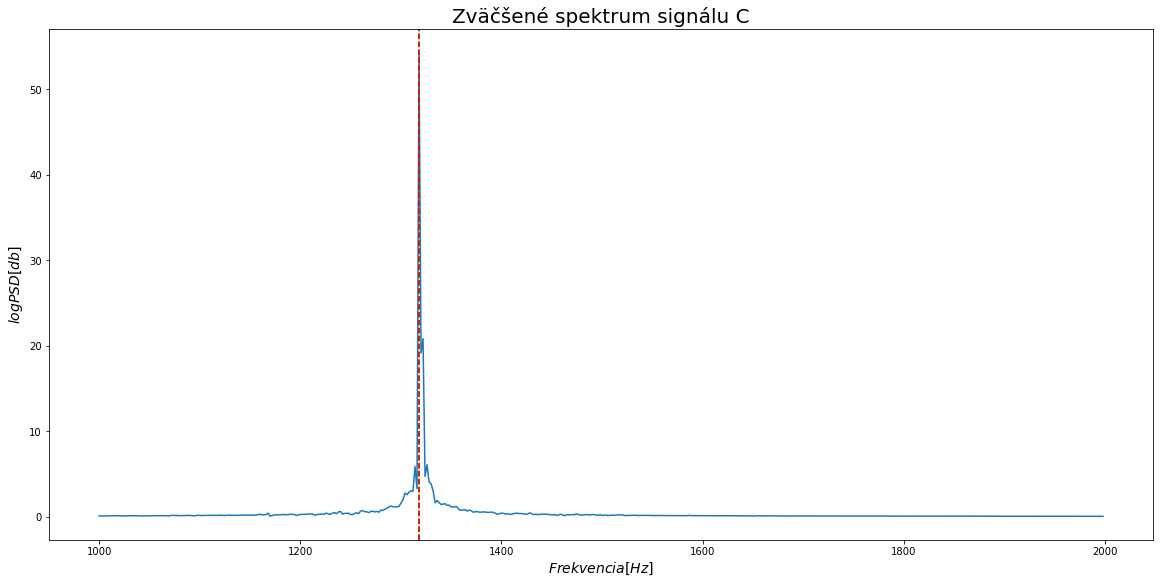

In [5]:
####################################################################
######################## Úloha 2 pomocou DFT:#######################
####################################################################

import scipy.signal as sc

plt.figure(figsize=(16,8), constrained_layout= True)
tmpDFT = np.fft.fft(xall[[88]][0])
tmpModul = np.abs(tmpDFT)
tmpModulHalf = tmpModul[:tmpModul.size//2]
FF = np.arange(tmpModulHalf.size) * (Fs/N)

plt.title(label='Zväčšené spektrum signálu C', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(FF[500:1000], tmpModulHalf[500:1000])

peaks, _ = sc.find_peaks(tmpModulHalf, height=30)

peaks *= 2
for peak in peaks:
    plt.axvline(x=peak, ls='--', color="g")

f0 = 0
for peak in peaks:
    print(peak, tmpModulHalf[peak])
    if tmpModulHalf[peak] > tmpModulHalf[f0]:
        f0 = peak
    

plt.axvline(x=f0, ls='--', color="r")


toneIndex = MIDIFROM

f0 = 0
freqWithDFT = []

while toneIndex <= MIDITO:
    # urobíme dft
    toneDFT = np.fft.fft(xall[[toneIndex]][0])
    # urobíme modul
    modul = np.abs(toneDFT)
    tmpModulHalf = modul[:modul.size//2]
    # nájdeme vrcholy (peaky)
    peaks, _ = sc.find_peaks(tmpModulHalf, height=15)
    peaks *= 2
    # nájdeme najväčší vrchol
    f0 = 0
    for peak in peaks:
        if tmpModulHalf[peak] > tmpModulHalf[f0]:
            f0 = peak
    
    freqWithDFT.append(f0)
    print("(DFT) MIDI", toneIndex, "má frekvenciu: ", f0)
    toneIndex += 1
    
    

(AC) MIDI 24 má frekvenciu:  32.80929596719071
(AC) MIDI 25 má frekvenciu:  34.757422157856624
(AC) MIDI 26 má frekvenciu:  36.83806600153492
(AC) MIDI 27 má frekvenciu:  39.02439024390244
(AC) MIDI 28 má frekvenciu:  41.343669250645995
(AC) MIDI 29 má frekvenciu:  43.7956204379562
(AC) MIDI 30 má frekvenciu:  46.42166344294004
(AC) MIDI 31 má frekvenciu:  49.18032786885246
(AC) MIDI 32 má frekvenciu:  52.11726384364821
(AC) MIDI 33 má frekvenciu:  55.172413793103445
(AC) MIDI 34 má frekvenciu:  58.465286236297196
(AC) MIDI 35 má frekvenciu:  61.935483870967744
(AC) MIDI 36 má frekvenciu:  65.57377049180327
(AC) MIDI 37 má frekvenciu:  69.46454413892909
(AC) MIDI 38 má frekvenciu:  73.61963190184049
(AC) MIDI 39 má frekvenciu:  77.92207792207793
(AC) MIDI 40 má frekvenciu:  82.61617900172118
(AC) MIDI 41 má frekvenciu:  87.75137111517367
(AC) MIDI 42 má frekvenciu:  92.84332688588007
(AC) MIDI 43 má frekvenciu:  98.36065573770492
(AC) MIDI 44 má frekvenciu:  104.34782608695652
(AC) MID

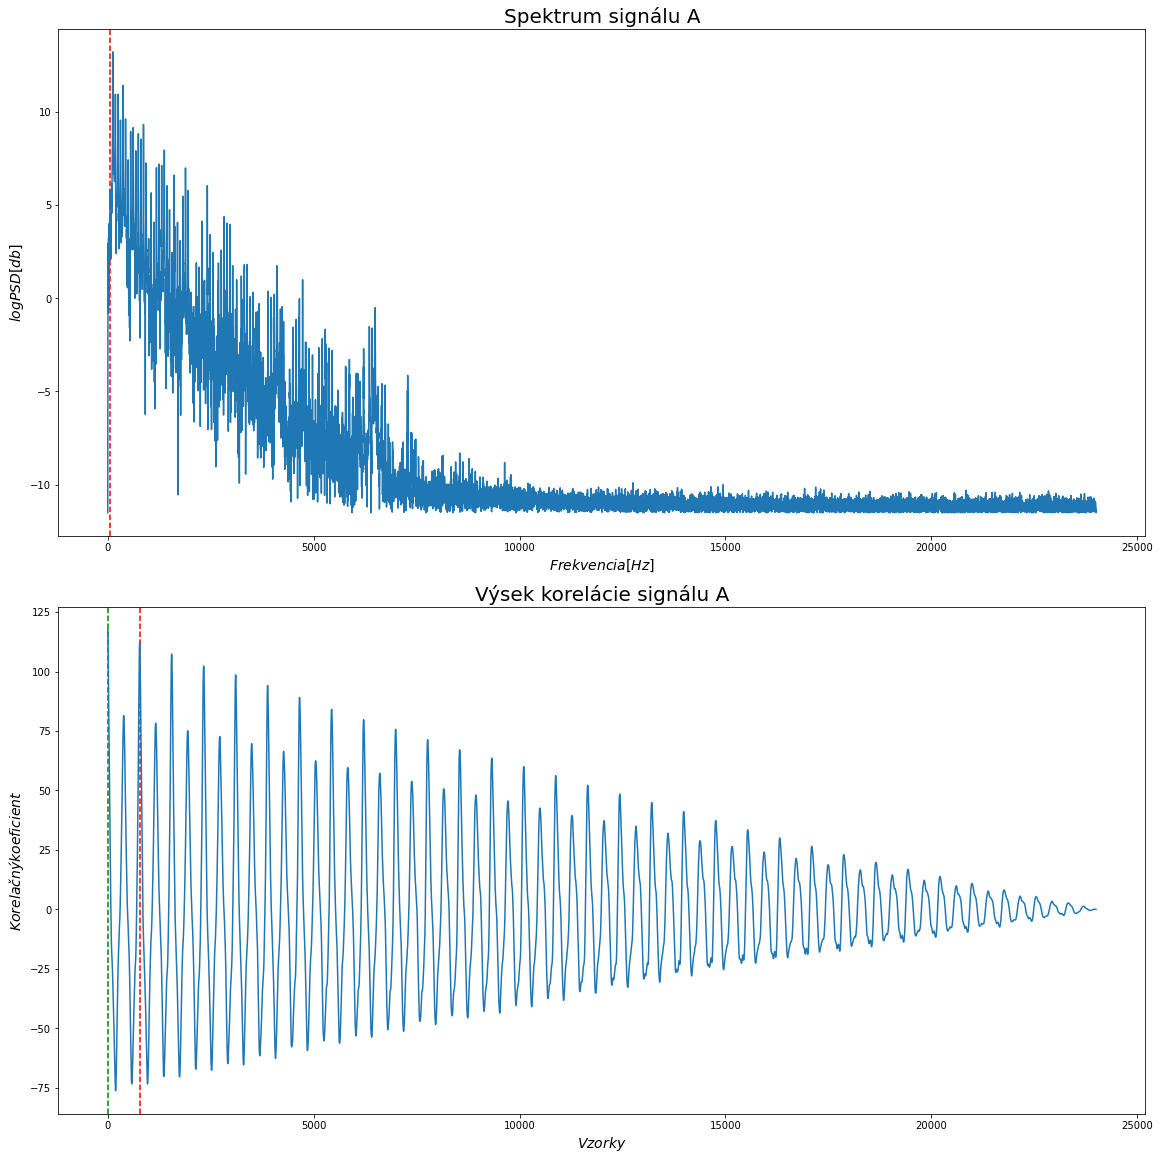

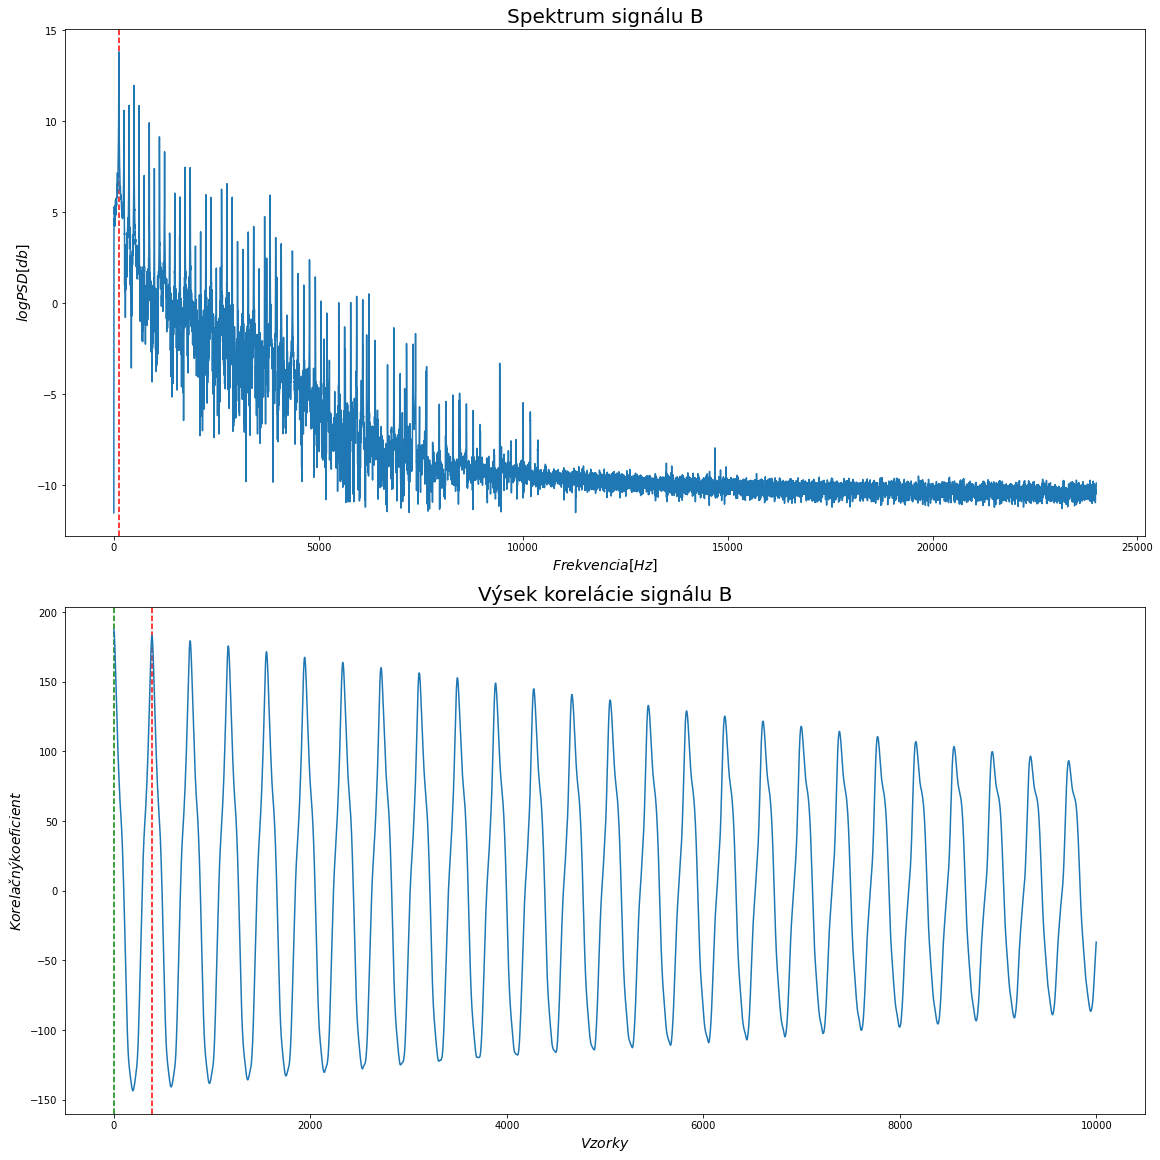

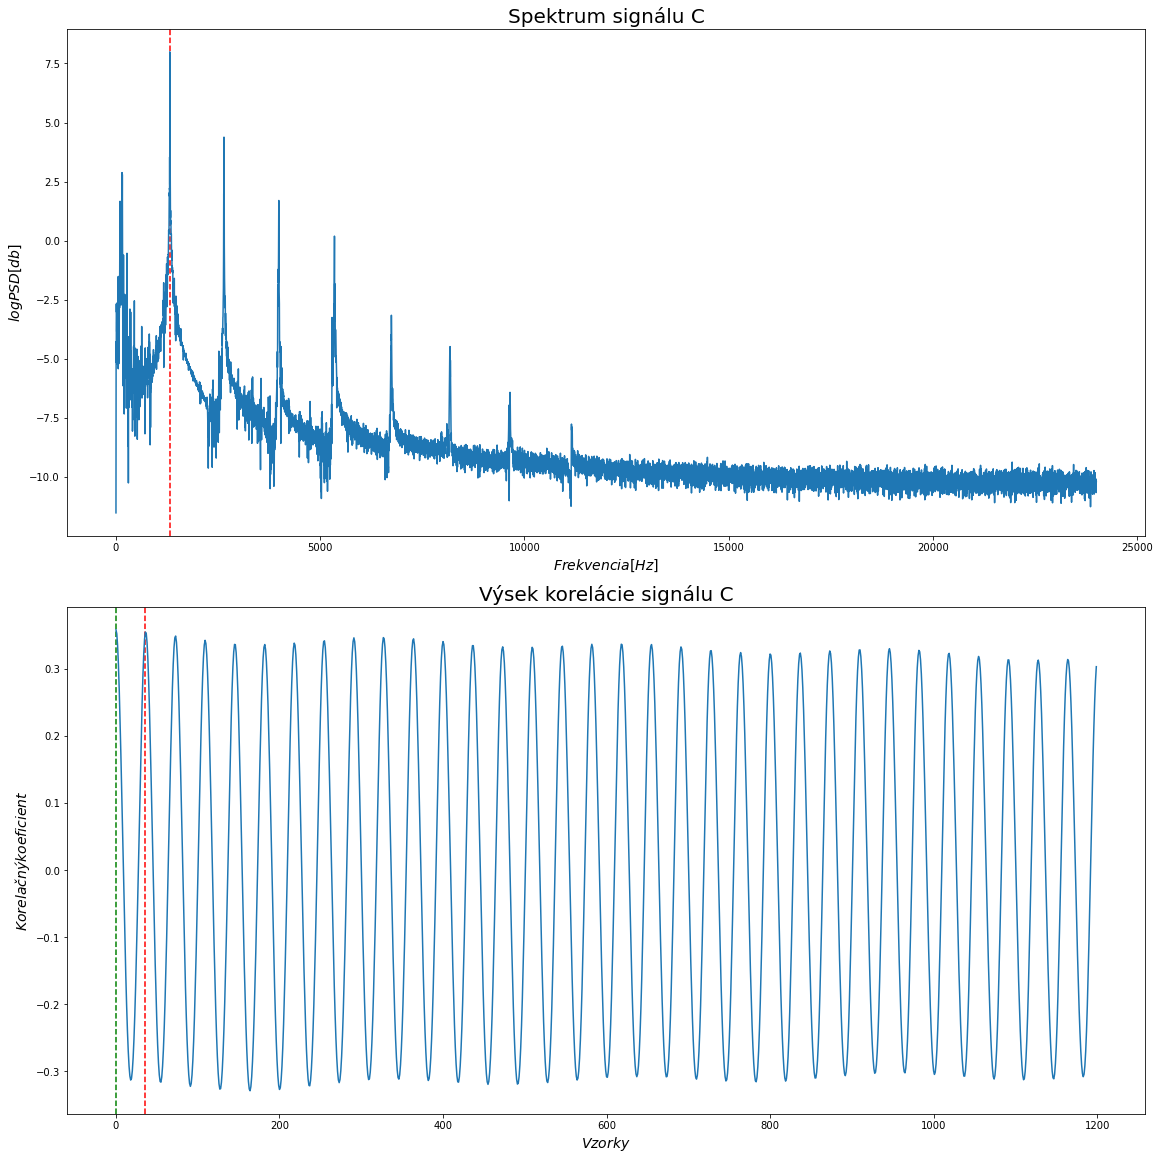

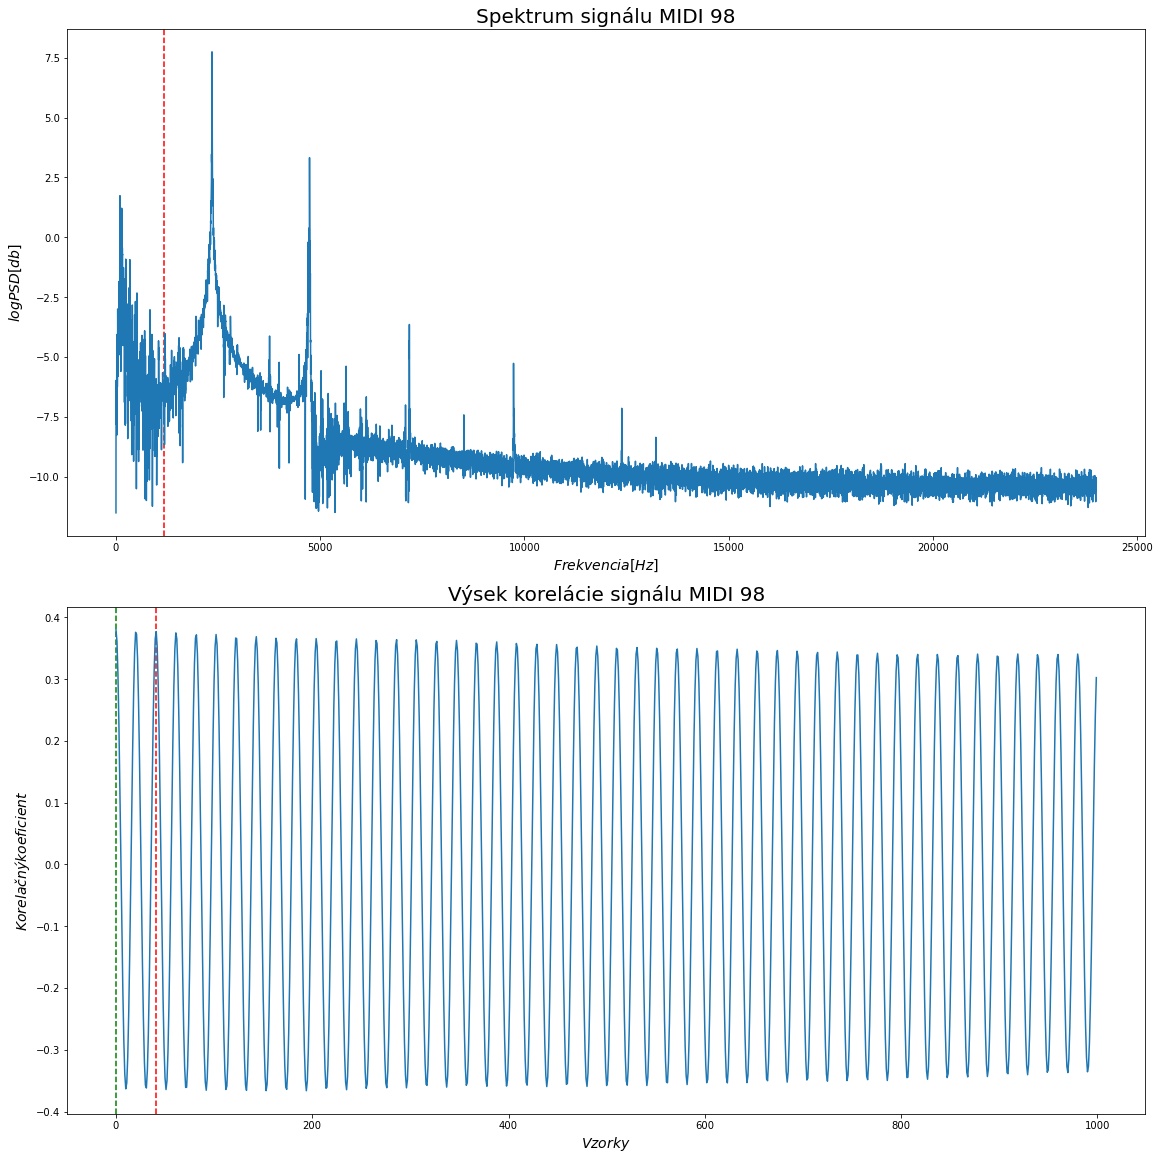

In [6]:
####################################################################
################## Úloha 2 pomocou autokorelácie: ##################
####################################################################

n = np.arange(0,N)

# Výpočet frekvencií všetkých tónov #

freqWithAC = []
toneIndex = MIDIFROM

while toneIndex <= MIDITO:
    # Korelácia tónu so sebou samým
    correlation = np.correlate(xall[[toneIndex]][0], xall[[toneIndex]][0], mode='full')
    correlation = correlation[23999:] # Ľavú časť signálu orežeme najväčšia hodnota korelačného koeficientu bude vzorok 0
    # Hľadane vrcholov
    peaks, _ = sc.find_peaks(correlation, height=0.01) # parameter height nastavený veľmi nízko aby sa dali odhaliť
                                                       # peaky aj pri vysokých frekvenciách a nedochádzalo k deleniu nulou
        
    # Nájdenie najväčšieho vrchoulu a jeho pozície
    max_peak = 0
    max_peak_n = 0
    for peak in peaks:
        if correlation[peak] > max_peak:
            max_peak_n = peak
            max_peak = correlation[peak]
            
    f0 = (1/abs(max_peak_n) * Fs)
    freqWithAC.append(f0)
    print("(AC) MIDI", toneIndex, "má frekvenciu: ", f0)
    toneIndex+=1

    
print("\n####################################################################\n")

# Výpočet frekvencií pre moje tóny #

# tón A

correlation = np.correlate(xall[[A]][0], xall[[A]][0], mode='full')
correlation = correlation[23999:]                          # Ľavú časť signálu orežeme
peaks, _ = sc.find_peaks(correlation, height=1)            # najväčšia hodnota korelačného koeficientu bude vzorok 0

# Nájdeme najväčší peak
max_peak = 0
max_peak_n = 0
for peak in peaks:
    if correlation[peak] > max_peak:
        max_peak_n = peak
        max_peak = correlation[peak]

# Výpočet    
f0_A = (1/abs(max_peak_n)) * Fs
print("Vypočítaná frekvencia môjho tónu A (MIDI 35) je: ", f0_A)

# Zobrazenie

plt.figure(figsize=(16,16), constrained_layout= True)
plt.subplot(211)
plt.title(label='Spektrum signálu A', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.axvline(x=f0_A, ls='--', color="r")
plt.plot(F_A, np.log(np.abs(moduleHalf_A)**2 + 10 ** -5))

plt.subplot(212)
plt.title(label='Výsek korelácie signálu A', fontsize='20')
plt.ylabel('$Korelačný koeficient$', fontsize='14')
plt.xlabel('$Vzorky$', fontsize='14')
plt.axvline(x=0, ls='--', color="g")
plt.axvline(x=max_peak_n, ls='--', color="r")
plt.plot(n[:32000], correlation[:32000])

# tón B

correlation = np.correlate(xall[[B]][0], xall[[B]][0], mode='full')
correlation = correlation[23999:]                          # Ľavú časť signálu orežeme
peaks, _ = sc.find_peaks(correlation, height=0.2)          # najväčšia hodnota korelačného koeficientu bude vzorok 0

max_peak = 0
max_peak_n = 0
for peak in peaks:
    if correlation[peak] > max_peak:
        max_peak_n = peak
        max_peak = correlation[peak]
        
        

f0_B = (1/abs(max_peak_n)) * Fs
print("(AC) Vypočítaná frekvencia môjho tónu B (MIDI 47) je: ", f0_B)

plt.figure(figsize=(16,16), constrained_layout= True)
plt.subplot(211)
plt.title(label='Spektrum signálu B', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.axvline(x=f0_B, ls='--', color="r")
plt.plot(F_B, np.log(np.abs(moduleHalf_B)**2 + 10 ** -5))

plt.subplot(212)
plt.title(label='Výsek korelácie signálu B', fontsize='20')
plt.ylabel('$Korelačný koeficient$', fontsize='14')
plt.xlabel('$Vzorky$', fontsize='14')
plt.axvline(x=0, ls='--', color="g")
plt.axvline(x=max_peak_n, ls='--', color="r")
plt.plot(n[:10000], correlation[:10000])

# tón C

correlation = np.correlate(xall[[C]][0], xall[[C]][0], mode='full')
correlation = correlation[23999:]                          # Ľavú časť signálu orežeme
peaks, _ = sc.find_peaks(correlation, height=0.01)         # najväčšia hodnota korelačného koeficientu bude vzorok 0

max_peak = 0
max_peak_n = 0
for peak in peaks:
    if correlation[peak] > max_peak:
        max_peak_n = peak
        max_peak = correlation[peak]
        

f0_C = (1/abs(max_peak_n)) * Fs
print("Vypočítaná frekvencia môjho tónu C (MIDI 88) je: ", f0_C)

plt.figure(figsize=(16,16), constrained_layout= True)
plt.subplot(211)
plt.title(label='Spektrum signálu C', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.axvline(x=f0_C, ls='--', color="r")
plt.plot(F_C, np.log(np.abs(moduleHalf_C)**2 + 10 ** -5))

plt.subplot(212)
plt.title(label='Výsek korelácie signálu C', fontsize='20')
plt.ylabel('$Korelačný koeficient$', fontsize='14')
plt.xlabel('$Vzorky$', fontsize='14')
plt.axvline(x=0, ls='--', color="g")
plt.axvline(x=max_peak_n, ls='--', color="r")
plt.plot(n[:1200], correlation[:1200])

print("\n####################################################################\n")

# Príklad zle určenej hodnoty #

correlation = np.correlate(xall[[98]][0], xall[[98]][0], mode='full')
correlation = correlation[23999:]                          # Ľavú časť signálu orežeme
peaks, _ = sc.find_peaks(correlation, height=0.01)         # najväčšia hodnota korelačného koeficientu bude vzorok 0

max_peak = 0
max_peak_n = 0
for peak in peaks:
    if correlation[peak] > max_peak:
        max_peak_n = peak
        max_peak = correlation[peak]
        

f0_98 = (1/abs(max_peak_n)) * Fs
print("(Chybná) Vypočítaná frekvencia môjho tónu MIDI 95 je: ", f0_98)

Tone98_DFT = np.fft.fft(xall[[98]][0])
module98 = np.abs(Tone98_DFT)
moduleHalf_98 = module98[:module98.size // 2]
F_98 = np.arange(moduleHalf_98.size) * (Fs/N)

plt.figure(figsize=(16,16), constrained_layout= True)
plt.subplot(211)
plt.title(label='Spektrum signálu MIDI 98', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.axvline(x=f0_98, ls='--', color="r")
plt.plot(F_98, np.log(np.abs(moduleHalf_98)**2 + 10 ** -5))

plt.subplot(212)
plt.title(label='Výsek korelácie signálu MIDI 98', fontsize='20')
plt.ylabel('$Korelačný koeficient$', fontsize='14')
plt.xlabel('$Vzorky$', fontsize='14')
plt.axvline(x=0, ls='--', color="g")
plt.axvline(x=max_peak_n, ls='--', color="r")
plt.plot(n[:1000], correlation[:1000])


# Možná oprava je túto frekvenciu vynásobiť dvomi
# Pre opravu všetkých tónov, ktorým bola zle určaná frekvencia môžeme v tomto prípade postupovať tak, že
# po tom ako určíme frekvenciu tónu, tak skontrolujeme frekvenciu predchádzajúceho tónu. Ak je frekvencia 
# predchádzajúceho tónu väčšia, tak frekvenciu aktuálne určovaného tónu vynásobíme dvomi.
# Toto je samozrejme možné len v tomto konkrétnom prípade, keďže vieme že tóny idú za sebou a teda vieme, že
# každý ďalší tón má väčšiu frekvenciu ako predošlý

plt.show()

(DTFT) MIDI 24 Vypočítaná frekvencia:  32.80929596719071 Spresnená pomocou DTFT:  32.67361757523091
(DTFT) MIDI 25 Vypočítaná frekvencia:  34.757422157856624 Spresnená pomocou DTFT:  34.621743765896824
(DTFT) MIDI 26 Vypočítaná frekvencia:  36.83806600153492 Spresnená pomocou DTFT:  36.68228710706256
(DTFT) MIDI 27 Vypočítaná frekvencia:  39.02439024390244 Spresnená pomocou DTFT:  38.868611349430076
(DTFT) MIDI 28 Vypočítaná frekvencia:  41.343669250645995 Spresnená pomocou DTFT:  41.16778985366107
(DTFT) MIDI 29 Vypočítaná frekvencia:  43.7956204379562 Spresnená pomocou DTFT:  43.62979129222756
(DTFT) MIDI 30 Vypočítaná frekvencia:  46.42166344294004 Spresnená pomocou DTFT:  46.22568354344255
(DTFT) MIDI 31 Vypočítaná frekvencia:  49.18032786885246 Spresnená pomocou DTFT:  48.97429771809869
(DTFT) MIDI 32 Vypočítaná frekvencia:  52.11726384364821 Spresnená pomocou DTFT:  51.87103268786932
(DTFT) MIDI 33 Vypočítaná frekvencia:  55.172413793103445 Spresnená pomocou DTFT:  54.96638364234

TONE:  25 Daná frekv. vs DTFT:  0.028256234103174904


TONE:  26 Daná frekv. vs vpočítaná:  0.12806600153491843
TONE:  26 Vypočítná  frekv. vs DTFT:  0.1557788944723626
TONE:  26 Daná frekv. vs DTFT:  0.027712892937444167


TONE:  27 Daná frekv. vs vpočítaná:  0.1343902439024376
TONE:  27 Vypočítná  frekv. vs DTFT:  0.1557788944723626
TONE:  27 Daná frekv. vs DTFT:  0.021388650569925005


TONE:  28 Daná frekv. vs vpočítaná:  0.143669250645992
TONE:  28 Vypočítná  frekv. vs DTFT:  0.17587939698492505
TONE:  28 Daná frekv. vs DTFT:  0.03221014633893304


TONE:  29 Daná frekv. vs vpočítaná:  0.14562043795620383
TONE:  29 Vypočítná  frekv. vs DTFT:  0.16582914572864382
TONE:  29 Daná frekv. vs DTFT:  0.020208707772439993


TONE:  30 Daná frekv. vs vpočítaná:  0.17166344294003721
TONE:  30 Vypočítná  frekv. vs DTFT:  0.1959798994974875
TONE:  30 Daná frekv. vs DTFT:  0.024316456557450294


TONE:  31 Daná frekv. vs vpočítaná:  0.18032786885245855
TONE:  31 Vypočítná  frekv. vs DTFT:  0.20603

61.935483870967744 660.5100502512563


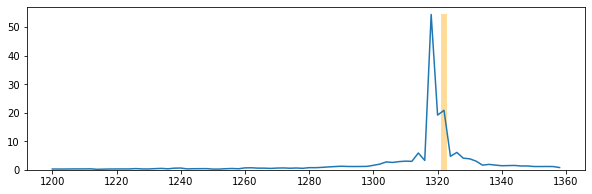

In [94]:
####################################################################
############################# Úloha 3: #############################
####################################################################

# Máme freqvenciu zistenú podľa DFT a Autokorelácie
# Autokorelácia je lepšie pre tóny s nižšou frekvenciou, DFT pre tóny s vyššou frekvenciou
# Tieto dve polia som sa rozhodol pomiešať, zobral som prvých 74 frekvencií (MIDI 24 - 73) určených podľa autokorelácie
# a zvyšných 34 hodnôt určených pomocou DFT (MIDI 74 - 108)

FindedFreq = freqWithAC[:50] + freqWithDFT[50:]
freqWithDTFT = []

n = np.arange(0,N)

FREQRANGE = 1
FREQPOINTS = 200

toneIndex = MIDIFROM
while toneIndex <= MIDITO:
    ffrom = FindedFreq[toneIndex - MIDIFROM]-FREQRANGE
    fto = FindedFreq[toneIndex - MIDIFROM]+FREQRANGE
    
    if toneIndex <= 41:                                # pri nízkych tónoch používam dvojnásobnú hodnotu frekvencie
        ffrom *= 2                                     # hlasitosť je tu zastúpená výraznejšie
        fto *= 2                                       # hodnotu 41 som odpozoroval, keď som si nechal vykresliť graf
    
    fsweep = np.linspace(ffrom, fto, FREQPOINTS)
    
    A_arr = np.zeros([FREQPOINTS, N],dtype=complex)
    for k in np.arange(0,FREQPOINTS):
        A_arr[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs

    Xdtft = np.matmul(A_arr,xall[[toneIndex]][0].T)

    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    
    if toneIndex <= 41:                               # Keže som pri nízkych tónoch násobil dvomi, tak výsledok bude
        precisefmax /= 2                              # mať dvojnásobnú frekvenciu, takže predelíme dvomi
    
    freqWithDTFT.append(precisefmax)
    print("(DTFT) MIDI", toneIndex,
          "Vypočítaná frekvencia: ", FindedFreq[toneIndex - MIDIFROM],
          "Spresnená pomocou DTFT: ", precisefmax)
    toneIndex += 1

    
print("\n####################################################################\n")
 
# Porovanie    
    
GivenMIDIFreq = [32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.00, 58.27, 61.74, 65.41, 69.30, 73.42,
           77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47, 130.81, 138.59, 146.83, 155.56, 164.81,
           174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94, 261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99,
           392.00, 415.30, 440.00, 466.16, 493.88, 523.25, 554.37, 587.33, 622.25, 659.26, 698.46, 739.99, 783.99, 830.61,
           880.00, 932.33, 987.77, 1046.50, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.00,
           1864.66, 1975.53, 2093.00, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00,
           3729.31, 3951.07, 4186.01]   

toneIndex = MIDIFROM

while toneIndex <= MIDITO:
    print("TONE: ", toneIndex, "Daná frekv. vs vpočítaná: ", abs(FindedFreq[toneIndex-MIDIFROM] - GivenMIDIFreq[toneIndex-MIDIFROM]))
    print("TONE: ", toneIndex, "Vypočítná  frekv. vs DTFT: ", abs(freqWithDTFT[toneIndex-MIDIFROM] - FindedFreq[toneIndex-MIDIFROM]))
    print("TONE: ", toneIndex, "Daná frekv. vs DTFT: ", abs(GivenMIDIFreq[toneIndex-MIDIFROM] - freqWithDTFT[toneIndex-MIDIFROM]))
    print("\n")
    toneIndex += 1
    

print("\n####################################################################\n")

# Ukážka pre tón MIDI 35

X = np.fft.fft(xall[[C]][0])
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

plt.figure(figsize=(16,8), constrained_layout= True)
plt.title(label='Spektrum signálu C', fontsize='20')
plt.ylabel('$Magnitúda(logPSD)[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(f[600:680],Xmag[600:680])        # Výsek aby aj bolo niečo vidieť

fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)

FREQRANGE = (FindedFreq[C - MIDIFROM]/3.5) * 2**(1/1200)

ffrom = FindedFreq[C-MIDIFROM]-FREQRANGE
fto = FindedFreq[C-MIDIFROM]+FREQRANGE

#ffrom *=2
#fto *= 2

plt.bar(ffrom,Xmax,fto-ffrom,linewidth=1,align='edge',color='orange',alpha=0.4) 

fsweep = np.linspace(ffrom, fto, FREQPOINTS)

# do the DTFT 
A_arr = np.zeros([FREQPOINTS, N],dtype=complex)

for k in np.arange(0,FREQPOINTS):
    A_arr[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs

Xdtft = np.matmul(A_arr,xall[[C]][0].T)

precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

#precisefmax /= 2

print(freqWithAC[C-MIDIFROM], precisefmax)

[123.30312854595559, 185.11800940184796, 247.03339277030312, 308.97892689252717, 370.85410925595727]
[100, 116, 126, 129, 122]
[0.0, 0.0, 0.0, 0.0, 0.0]
Modul: 100
Modul: 116
Modul: 126
Modul: 129
Modul: 122


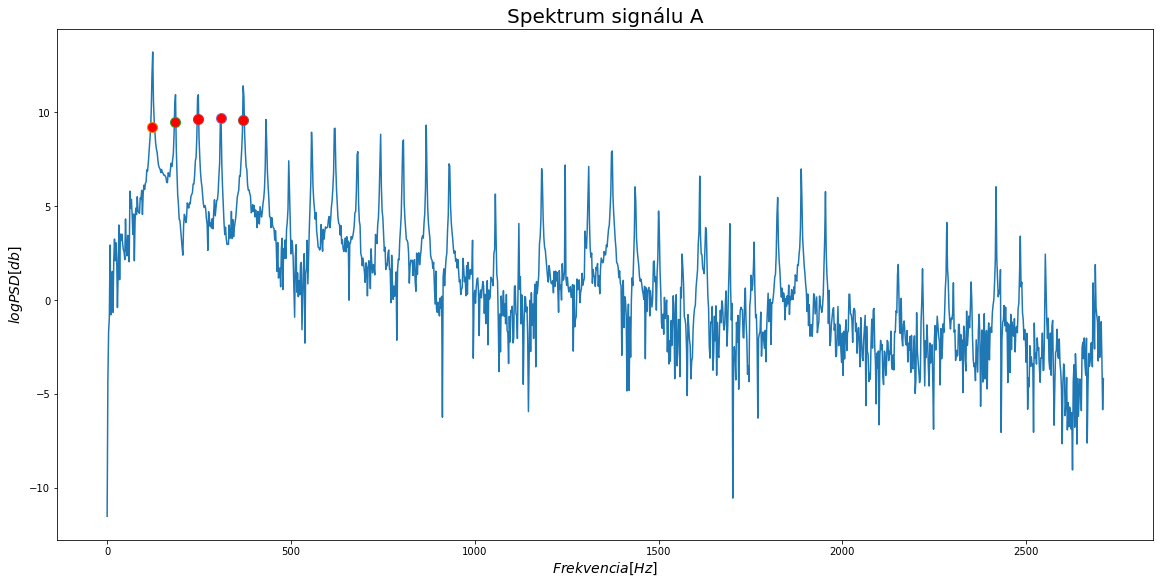

[1321.0150753768844, 2643.040201005025, 3962.0603015075376, 5285.08040201005, 6605.6381909547745]
[99, 199, 0, 199, 153]
[0.0, 0.0, 0.0, 0.0, 0.0]
Modul: 99
Modul: 199
Modul: 0
Modul: 199
Modul: 153


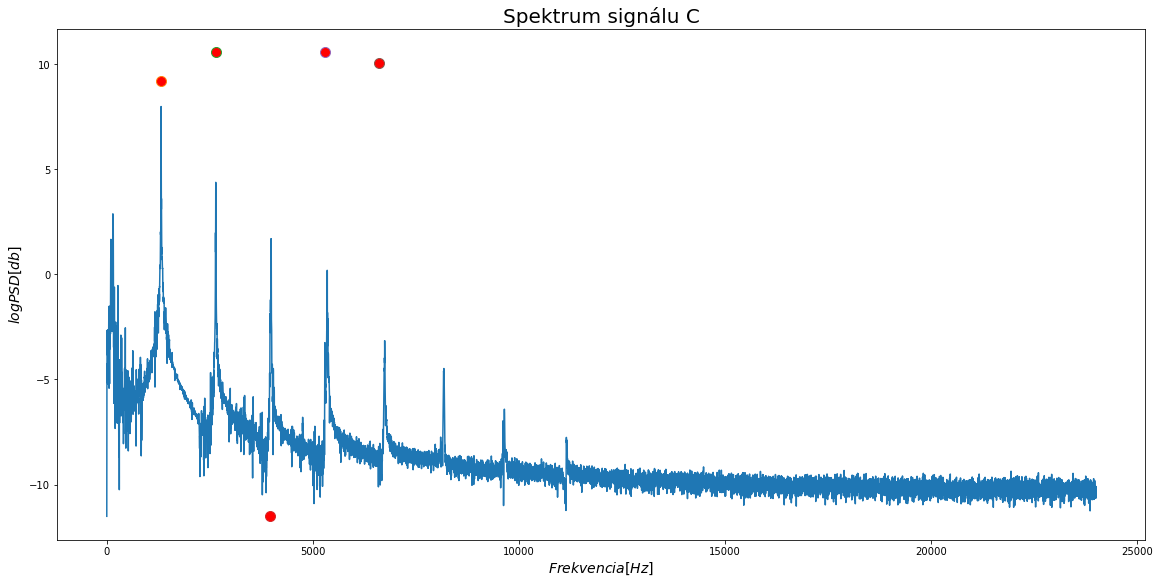

In [90]:
####################################################################
############################# Úloha 4: #############################
####################################################################

#freqWithDTFT
# Pre tón A #

# Aproximácia FR
f0ToTimes5 = []
moduls = []
phases = []
# f0
ff0 = (freqWithDTFT[A - MIDIFROM])
for i in range(0,5):
    if i == 0:
        ff = (ff0*2) * (i+1)
    else:
        ff = f0ToTimes5[i-1] + ff0
    # DTFT
    ffrom = ff-FREQRANGE
    fto = ff+FREQRANGE

    fsweep = np.linspace(ffrom, fto, FREQPOINTS)

    A_arr = np.zeros([FREQPOINTS, N],dtype=complex)
    for k in np.arange(0,FREQPOINTS):
        A_arr[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs

    Xdtft = np.matmul(A_arr,xall[[A]][0].T)

    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    # Uloženie hodnoty
    moduls.append(np.argmax(np.abs(Xdtft)))
    phases.append(np.angle(moduls[i]))
    f0ToTimes5.append(precisefmax)

    
print(f0ToTimes5)
print(moduls)
print(phases)

# Spektrum signálu A
plt.figure(figsize=(16,8), constrained_layout= True)
plt.title(label='Spektrum signálu A', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(F_A[:int(f0ToTimes5[0]*11)], (np.log(np.abs(moduleHalf_A)**2 + 10 ** -5))[:int(f0ToTimes5[0]*11)])


for j in range(0,5):
    print("Modul:",moduls[j])
    plt.plot(f0ToTimes5[j], (np.log(moduls[j]**2 + 10 ** -5)), marker="o", markersize=10, markerfacecolor="red")

plt.show()
    

# Pre tón C #

# Aproximácia FR
f0ToTimes5 = []
moduls = []
phases = []
# f0
ff0 = (freqWithDTFT[C - MIDIFROM])
for i in range(0,5):
    ff = ff0 * (i+1)
    # DTFT
    ffrom = ff-FREQRANGE
    fto = ff+FREQRANGE

    fsweep = np.linspace(ffrom, fto, FREQPOINTS)

    A_arr = np.zeros([FREQPOINTS, N],dtype=complex)
    for k in np.arange(0,FREQPOINTS):
        A_arr[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs

    Xdtft = np.matmul(A_arr,xall[[C]][0].T)

    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    # Uloženie hodnoty
    moduls.append(np.argmax(np.abs(Xdtft)))
    phases.append(np.angle(moduls[i]))
    f0ToTimes5.append(precisefmax)
 

    
print(f0ToTimes5)
print(moduls)
print(phases)

# Spektrum signálu C
plt.figure(figsize=(16,8), constrained_layout= True)
plt.title(label='Spektrum signálu C', fontsize='20')
plt.ylabel('$logPSD[db]$', fontsize='14')
plt.xlabel('$Frekvencia[Hz]$', fontsize='14')
plt.plot(F_C[:int(f0ToTimes5[0]*11)], (np.log(np.abs(moduleHalf_C)**2 + 10 ** -5))[:int(f0ToTimes5[0]*11)])

for j in range(0,5):
    plt.plot(f0ToTimes5[j], (np.log(moduls[j]**2 + 10 ** -5)), marker="o", markersize=10, markerfacecolor="red")

plt.show()